In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [38]:
df = pd.read_csv('C:\Users\91949\Downloads')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1647495393.py, line 1)

In [39]:
df = pd.read_csv(r'C:\Users\91949\Downloads\seattle-weather.csv')

In [40]:
df


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [41]:
print(df.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [42]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [43]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [44]:
df = df.dropna()        # or df.fillna(df.mean())


In [45]:
df = df[['precipitation', 'temp_max', 'temp_min', 'wind']]


In [46]:
X = df[['precipitation', 'temp_max', 'temp_min']]
y = df['wind']


In [47]:
print(X)

      precipitation  temp_max  temp_min
0               0.0      12.8       5.0
1              10.9      10.6       2.8
2               0.8      11.7       7.2
3              20.3      12.2       5.6
4               1.3       8.9       2.8
...             ...       ...       ...
1456            8.6       4.4       1.7
1457            1.5       5.0       1.7
1458            0.0       7.2       0.6
1459            0.0       5.6      -1.0
1460            0.0       5.6      -2.1

[1461 rows x 3 columns]


In [48]:
pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

In [49]:
print(y)

0       4.7
1       4.5
2       2.3
3       4.7
4       6.1
       ... 
1456    2.9
1457    1.3
1458    2.6
1459    3.4
1460    3.5
Name: wind, Length: 1461, dtype: float64


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
print(X_train.shape)

(1168, 3)


In [52]:
print(y_train.shape)

(1168,)


In [53]:
print(y_train.head)

<bound method NDFrame.head of 1066    5.7
638     6.3
799     2.2
380     2.3
303     2.8
       ... 
1130    1.7
1294    3.4
860     2.1
1459    3.4
1126    1.9
Name: wind, Length: 1168, dtype: float64>


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
scores = cross_val_score(model, X, y, cv=5)
print("cross validation scores:", scores)
print("average accuracy:", scores.mean())

cross validation scores: [0.03509275 0.11131695 0.13302798 0.02985866 0.22921408]
average accuracy: 0.10770208344590464


In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 1.8656917751618332
R2 Score: 0.13921901456609675


In [57]:
from sklearn.metrics import r2_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
#underfitting

Train R2: 0.11481885842194539
Test R2: 0.13921901456609675


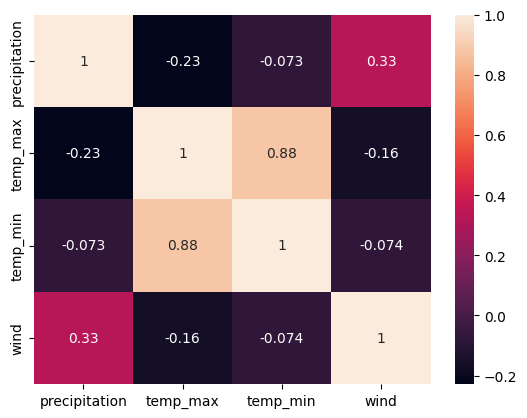

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()


In [59]:
#overcome underfitting we use random forest reggressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X = df[['precipitation', 'temp_max', 'temp_min']]
y = df['wind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=300,max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, test_pred))


Train R2: 0.25522633830388686
Test R2: 0.12671576269414286


In [61]:
#
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, model.predict(X_test)))


Train R2: 0.1401810625196045
Test R2: 0.14786361071176446


In [62]:
pipeline.fit(X, y)


,steps,"[('poly', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [63]:
new_data = pd.DataFrame(
    [[0.2, 32, 24]],
    columns=['precipitation', 'temp_max', 'temp_min']
)

prediction = pipeline.predict(new_data)
print(prediction[0])


1.9089487273657229


In [65]:
import pandas as pd

new_data = pd.DataFrame(
    [[0.2, 32, 24]],
    columns=['precipitation', 'temp_max', 'temp_min']
)
new_data_poly = poly.transform(new_data) 
prediction = model.predict(new_data_poly)
print("Predicted Temperature:", prediction[0])


Predicted Temperature: 1.749437156093291


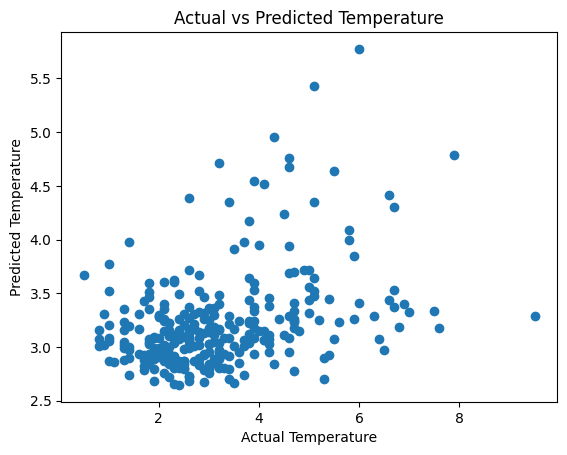

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [31]:
print(y.min(), y.max())


0.4 9.5


In [67]:
model = pickle.load(open("weather_pipeline.pkl", "rb"))


FileNotFoundError: [Errno 2] No such file or directory: 'weather_pipeline.pkl'

In [68]:
import os
os.getcwd()



'C:\\Users\\91949\\desktop'

In [1]:
import os
os.chdir(r"C:\sidhu\sidhu\Weather_Wind_Prediction")
os.getcwd()


'C:\\sidhu\\sidhu\\Weather_Wind_Prediction'

In [2]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example dataset (replace with your real dataset if you have one)
data = {
    "precipitation": [0.1, 0.3, 0.0, 0.5, 0.2],
    "temp_max": [30, 35, 28, 40, 32],
    "temp_min": [20, 25, 18, 30, 24],
    "wind": [5, 7, 3, 9, 6]
}

df = pd.DataFrame(data)

X = df[['precipitation', 'temp_max', 'temp_min']]
y = df['wind']

pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

pipeline.fit(X, y)

pickle.dump(pipeline, open("final_pipeline.pkl", "wb"))

print("Model saved successfully!")


Model saved successfully!


In [3]:
os.listdir()


['app.py', 'final_pipeline.pkl']

In [4]:
new_data = pd.DataFrame(
    [[0.2, 32, 24]],
    columns=['precipitation', 'temp_max', 'temp_min']
)

prediction = pipeline.predict(new_data)
print(prediction)


[6.]
